In [2]:
from helper import EducationData_API
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Apply PCA to find most relevant features

In [5]:
# Loads data from csv
finance_df_2016 = pd.read_csv('data/ccd_finance/2016_finance.csv')
finance_df_2016.replace(-1, np.nan, inplace=True)
finance_df_2016.replace(-2, np.nan, inplace=True)
finance_df_2016.replace(-3, np.nan, inplace=True)
finance_df_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18680 entries, 0 to 18679
Columns: 133 entries, year to enrollment_fall_school
dtypes: float64(130), int64(2), object(1)
memory usage: 19.0+ MB


In [6]:
# Find possible identifier columns
for column in finance_df_2016.columns:
    if finance_df_2016[column].nunique() > 10000:
        print('{}: {}'.format(column, finance_df_2016[column].nunique()))
        
identifier_columns = [
    'leaid',
    'censusid'
]

leaid: 18680
censusid: 14667
rev_total: 13837
rev_state_total: 11418
rev_state_gen_formula_assist: 10005
rev_local_total: 10953
exp_total: 13757
exp_current_elsec_total: 13322
exp_current_instruction_total: 11662
exp_current_supp_serve_total: 10169
salaries_total: 11445
salaries_instruction: 10148


In [7]:
# Find possible categorical columns
for column in finance_df_2016.columns:
    if finance_df_2016[column].nunique() < 1000:
        print('{}: {}'.format(column, finance_df_2016[column].nunique()))
        
categorical_columns = [
    'year',
    'fips'
]

year: 1
fips: 51
rev_fed_state_math_sci_teach: 887
rev_fed_state_drug_free: 198
rev_fed_state_vocational: 592
rev_fed_state_bilingual_ed: 474
rev_fed_direct_impact_aid: 597
rev_fed_direct_indian_ed: 270
rev_fed_arra: 0
rev_fed_nonspec: 752
rev_state_vocational_ed: 825
rev_state_bilingual_ed: 501
rev_state_gifted_talented: 465
rev_state_sch_lunch: 533
rev_state_not_employee_benefits: 670
rev_state_nonspec: 786
rev_local_sales_tax: 474
rev_local_utility_tax: 419
rev_local_income_tax: 812
rev_local_other_tax: 819
rev_local_tuition_fees: 946
rev_local_transportation_fees: 272
rev_local_textbook_sales_rents: 401
rev_local_student_fees_nonspec: 200
rev_local_rents_royalties: 772
rev_local_property_sale: 476
rev_local_fines_forfeits: 507
rev_local_private_contrib: 864
exp_current_supp_serv_nonspec: 75
exp_current_enterprise: 740
exp_current_other_elsec: 237
exp_nonelsec_adult_education: 926
exp_nonelsec_other: 632
exp_current_arra: 0
exp_tech_equipment: 836
outlay_capital_nonspec_equip: 555
o

In [8]:
# Find empty columns
empty_columns = []
for column in finance_df_2016.columns:
    if finance_df_2016[column].isna().sum() > 2500:
        empty_columns.append(column)
        print('{}: {}'.format(column, finance_df_2016[column].isna().sum()))

censusid: 4013
rev_fed_arra: 18680
rev_local_parent_govt: 17506
rev_local_prop_tax: 6127
rev_local_sales_tax: 6734
rev_local_utility_tax: 6733
rev_local_income_tax: 6734
rev_local_other_tax: 6727
exp_current_arra: 18680
exp_current_state_local_funds: 10069
exp_current_federal_funds: 10069
outlay_capital_arra: 18680


In [9]:
# Select columns that aren't identifiers or categorical
X = finance_df_2016[[
    column 
    for column in finance_df_2016.columns 
    if column not in identifier_columns + categorical_columns + empty_columns
]].dropna()

# Scale columns
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [10]:
# PCA feature selection
pca = PCA(n_components=10)
pca.fit(X_scaled)
pca.explained_variance_ratio_

array([0.46616204, 0.10084479, 0.04011619, 0.02885506, 0.02709083,
       0.02206693, 0.01993753, 0.01706356, 0.01519377, 0.01456437])

In [11]:
# Use 3 components based on elbow method
pca = PCA(n_components=3)
pca.fit(X_scaled)

PCA(n_components=3)

In [12]:
# find top features in each component
top_features = pd.DataFrame(
    np.absolute(pca.components_),
    columns=X.columns,
    index = ['PC1', 'PC2', 'PC3']
)

<BarContainer object of 118 artists>

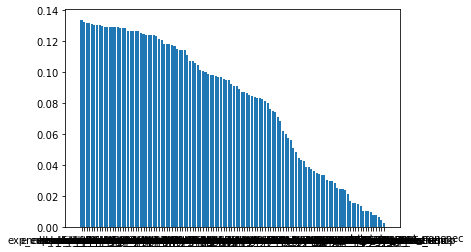

In [13]:
pc1_weights = top_features.loc['PC1'].sort_values(ascending=False)
plt.bar(pc1_weights.index, pc1_weights.values)

In [14]:
pc1_weights[pc1_weights > 0.12]

exp_current_supp_serve_total      0.133968
exp_current_other                 0.132572
exp_current_food_serv             0.132210
enrollment_fall_responsible       0.131707
enrollment_fall_school            0.131543
salaries_total                    0.130909
rev_fed_total                     0.130859
salaries_food_service             0.130610
benefits_supp_sch_admin           0.129960
exp_current_sch_admin             0.129431
rev_fed_child_nutrition_act       0.129396
salaries_supp_bco                 0.129348
rev_total                         0.129337
exp_current_elsec_total           0.129266
salaries_teachers_regular_prog    0.129146
rev_state_total                   0.128725
exp_total                         0.128683
salaries_supp_sch_admin           0.128654
exp_current_bco                   0.127038
rev_state_gen_formula_assist      0.126668
salaries_supp_operation_plant     0.126648
exp_current_operation_plant       0.126631
salaries_instruction              0.126553
rev_fed_sta

<BarContainer object of 118 artists>

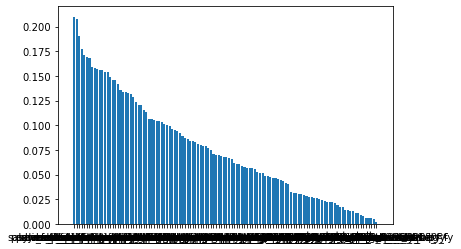

In [15]:
pc2_weights = top_features.loc['PC2'].sort_values(ascending=False)
plt.bar(pc2_weights.index, pc2_weights.values)

In [16]:
pc2_weights[pc2_weights > 0.175]

rev_fed_nonspec                 0.210042
payments_private_schools        0.207692
salaries_teachers_vocational    0.190345
payments_charter_schools        0.176944
Name: PC2, dtype: float64

<BarContainer object of 118 artists>

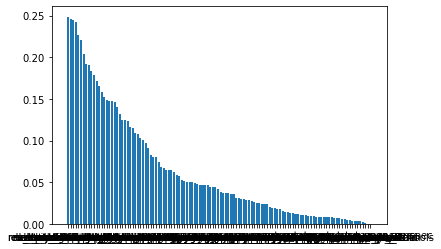

In [17]:
pc3_weights = top_features.loc['PC3'].sort_values(ascending=False)
plt.bar(pc3_weights.index, pc3_weights.values)

In [18]:
pc3_weights[pc3_weights > 0.22]

rev_state_bilingual_ed           0.248521
rev_state_gifted_talented        0.246353
exp_utilities_energy             0.244135
rev_state_vocational_ed          0.241757
rev_local_dist_activ_receipts    0.226327
assets_sinking_fund              0.220916
Name: PC3, dtype: float64

In [19]:
most_important_features = (
    list(pc1_weights[pc1_weights > 0.12].index) + 
    list(pc2_weights[pc2_weights > 0.175].index) + 
    list(pc3_weights[pc3_weights > 0.22].index)
)

In [20]:
most_important_features

['exp_current_supp_serve_total',
 'exp_current_other',
 'exp_current_food_serv',
 'enrollment_fall_responsible',
 'enrollment_fall_school',
 'salaries_total',
 'rev_fed_total',
 'salaries_food_service',
 'benefits_supp_sch_admin',
 'exp_current_sch_admin',
 'rev_fed_child_nutrition_act',
 'salaries_supp_bco',
 'rev_total',
 'exp_current_elsec_total',
 'salaries_teachers_regular_prog',
 'rev_state_total',
 'exp_total',
 'salaries_supp_sch_admin',
 'exp_current_bco',
 'rev_state_gen_formula_assist',
 'salaries_supp_operation_plant',
 'exp_current_operation_plant',
 'salaries_instruction',
 'rev_fed_state_title_i',
 'exp_current_instruction_total',
 'rev_fed_state_idea',
 'benefits_employee_total',
 'benefits_supp_bco',
 'debt_longterm_outstand_beg_fy',
 'debt_longterm_outstand_end_fy',
 'rev_local_total',
 'benefits_supp_operation_plant',
 'rev_fed_nonspec',
 'payments_private_schools',
 'salaries_teachers_vocational',
 'payments_charter_schools',
 'rev_state_bilingual_ed',
 'rev_state_g